In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [156]:
sns.get_dataset_names()[0:10]

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights']

## Planets Dataframe

In [3]:
df_planets = sns.load_dataset('planets')
df_planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

In [4]:
df_planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [5]:
df_planets.shape

(1035, 6)

In [6]:
df_planets.describe().T

count         mean           std          min         25%  \
number          1035.0     1.785507      1.240976     1.000000     1.00000   
orbital_period   992.0  2002.917596  26014.728304     0.090706     5.44254   
mass             513.0     2.638161      3.818617     0.003600     0.22900   
distance         808.0   264.069282    733.116493     1.350000    32.56000   
year            1035.0  2009.070531      3.972567  1989.000000  2007.00000   

                      50%       75%       max  
number             1.0000     2.000       7.0  
orbital_period    39.9795   526.005  730000.0  
mass               1.2600     3.040      25.0  
distance          55.2500   178.500    8500.0  
year            2010.0000  2012.000    2014.0

In [7]:
df_planets.method = pd.Categorical(df_planets.method) 
# do this for "object" type data while predicting for efficiency.

In [8]:
df_planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   method          1035 non-null   category
 1   number          1035 non-null   int64   
 2   orbital_period  992 non-null    float64 
 3   mass            513 non-null    float64 
 4   distance        808 non-null    float64 
 5   year            1035 non-null   int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 42.0 KB


In [9]:
df_planets.isnull().values.any()

True

In [10]:
df_planets.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [11]:
df_planets['mass'].fillna(value=df_planets['mass'].median(), inplace=True)
df_planets['distance'].fillna(value=df_planets['distance'].median(), inplace=True)
df_planets['orbital_period'].fillna(value=df_planets['orbital_period'].median(), inplace=True)

In [12]:
df_planets.isnull().values.any()

False

In [13]:
temp_categorical_df = df_planets.select_dtypes(include=['category'])
temp_categorical_df.head()

method
0  Radial Velocity
1  Radial Velocity
2  Radial Velocity
3  Radial Velocity
4  Radial Velocity

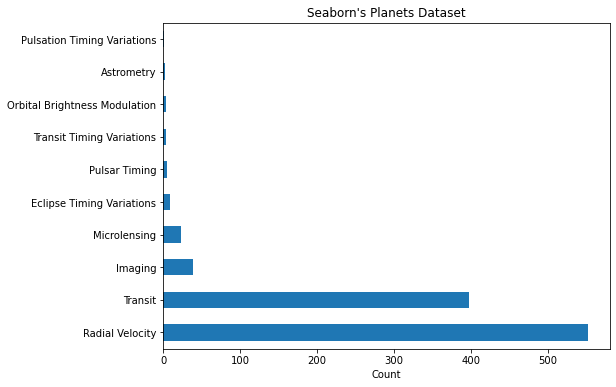

In [14]:
plt.figure(figsize=(8,6))
temp_categorical_df['method'].value_counts().plot(kind='barh');
plt.title("Seaborn's Planets Dataset",loc='center')
plt.xlabel('Count');

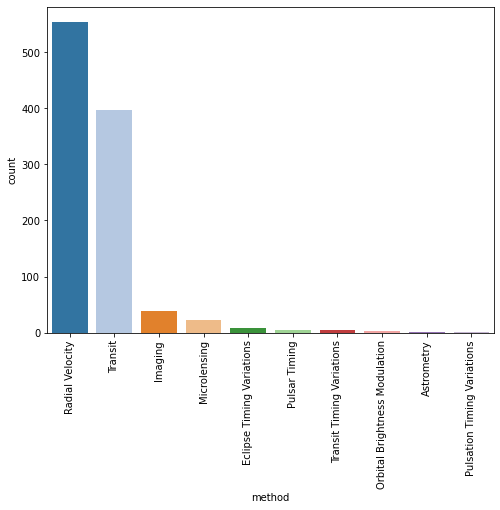

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data=temp_categorical_df, x='method', order=temp_categorical_df['method'].value_counts().index, palette='tab20')
plt.xticks(rotation=90);

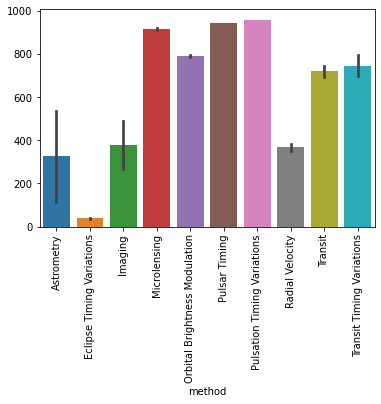

In [16]:
sns.barplot(data=temp_categorical_df, x='method', y=temp_categorical_df.method.index)
plt.xticks(rotation=90);

In [153]:
# prepare data frames
df2011 = df_planets[df_planets.year == 2011].iloc[:100,:]
df2012 = df_planets[df_planets.year == 2012].iloc[:100,:]
df2013 = df_planets[df_planets.year == 2013].iloc[:100,:]

# creating trace1
trace1 =go.Scatter(
                    x = df2011.orbital_period,
                    y = df2011.mass,
                    mode = "markers",
                    name = "2011",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2011.method)
# creating trace2
trace2 =go.Scatter(
                    x = df2012.orbital_period,
                    y = df2012.mass,
                    mode = "markers",
                    name = "2012",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2012.method)
# creating trace3
trace3 =go.Scatter(
                    x = df2013.orbital_period,
                    y = df2013.mass,
                    mode = "markers",
                    name = "2013",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2013.method)

data = [trace1, trace2, trace3]
layout = dict(title = 'Orbital Period vs Mass with 2011, 2012 and 2013 years',
              xaxis= dict(title= 'Orbital Period',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Mass',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [155]:
df2012 = df_planets[df_planets.year == 2012].iloc[:100,:]

x = df2012.method

trace1 = {
  'x': x,
  'y': df2012.mass,
  'name': 'mass',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': df2012.orbital_period,
  'name': 'orbital_period',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'X Axis'},
  'barmode': 'relative',
  'title': 'mass and orbital_period in 2014'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Diamonds Dataframe

In [17]:
df_diamonds = sns.load_dataset('diamonds')
df_diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [18]:
df_diamonds.isnull().values.any()

False

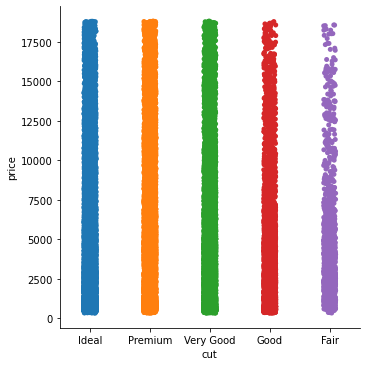

In [19]:
sns.catplot(x='cut', y='price', data= df_diamonds,palette='tab10');

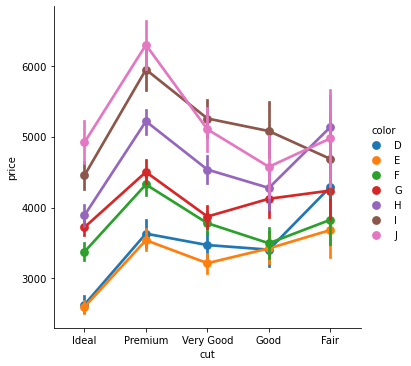

In [67]:
sns.catplot(x='cut',y='price',hue='color', data=df_diamonds, kind='point');
# options for kind -> "strip", "swarm", "box", "violin", "boxen", "point", "bar", or "count".

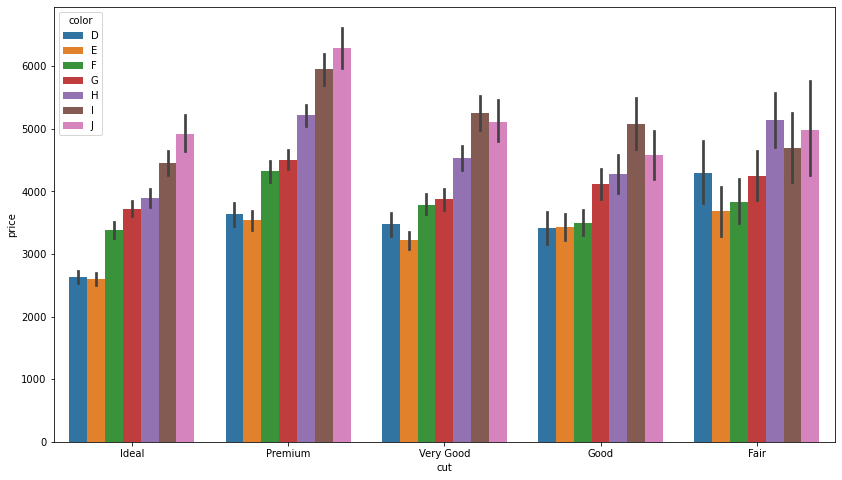

In [20]:
plt.figure(figsize=(14,8))
sns.barplot(x='cut', y='price', hue='color', data=df_diamonds);

In [21]:
df_diamonds.groupby(['cut','color'])['price'].mean()

cut        color
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Fair       D        4291.061350
           E        3682.312500
           F        382

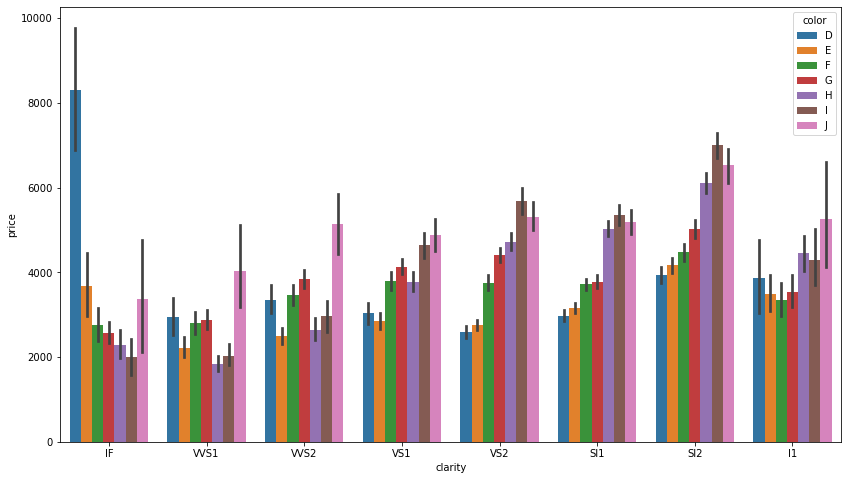

In [22]:
plt.figure(figsize=(14,8))
sns.barplot(x='clarity', y='price', hue='color', data=df_diamonds);

In [23]:
df_diamonds.groupby(['clarity','color'])['price'].mean()

clarity  color
IF       D        8307.369863
         E        3668.506329
         F        2750.836364
         G        2558.033774
         H        2287.869565
         I        1994.937063
         J        3363.882353
VVS1     D        2947.912698
         E        2219.820122
         F        2804.276567
         G        2866.820821
         H        1845.658120
         I        2034.861972
         J        4034.175676
VVS2     D        3351.128391
         E        2499.674067
         F        3475.512821
         G        3845.283437
         H        2649.067434
         I        2968.232877
         J        5142.396947
VS1      D        3030.158865
         E        2856.294301
         F        3796.717742
         G        4131.362197
         H        3780.688623
         I        4633.183992
         J        4884.461255
VS2      D        2587.225692
         E        2750.941700
         F        3756.795093
         G        4416.256498
         H        4722.41

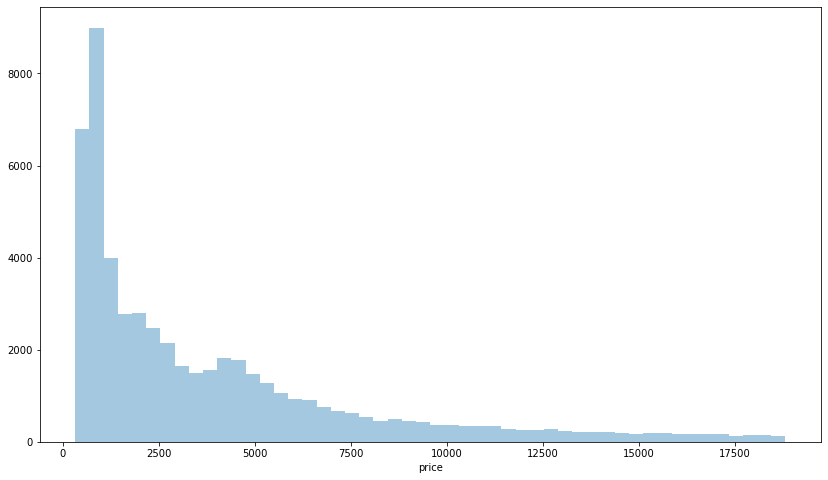

In [24]:
plt.figure(figsize=(14,8))
sns.distplot(df_diamonds.price,kde=False, bins=50)
plt.show()

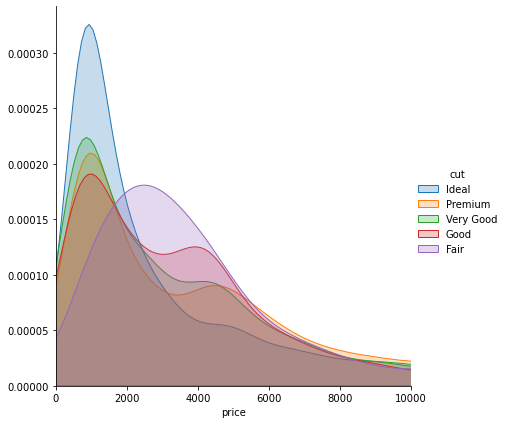

In [61]:
sns.FacetGrid(df_diamonds, hue='cut',height=6,xlim=(0,10000)).map(sns.kdeplot, "price",shade=True).add_legend();

## Tips Dataframe

In [25]:
df_tips = sns.load_dataset("tips")
df_tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### FacetGrid Plots

<Figure size 720x432 with 0 Axes>

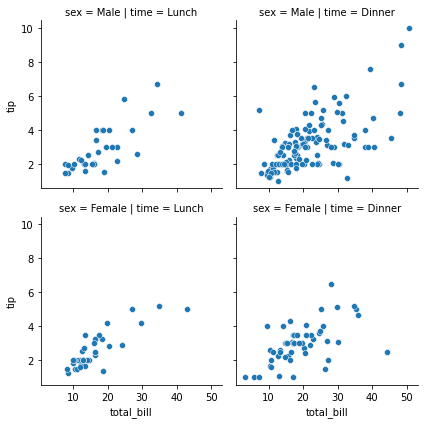

In [40]:
plt.figure(figsize=(10,6))
g = sns.FacetGrid(df_tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")
plt.show();

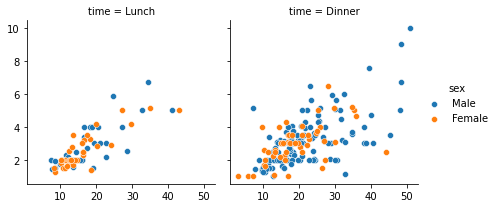

In [38]:
g = sns.FacetGrid(df_tips, col="time", hue="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()

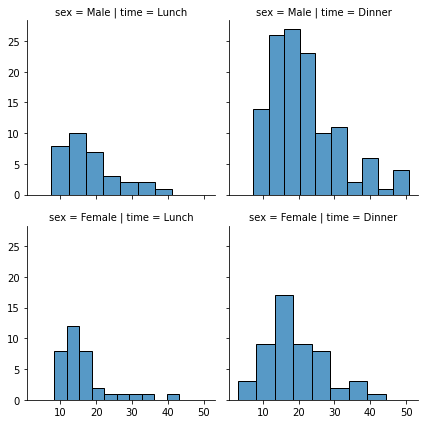

In [37]:
g = sns.FacetGrid(df_tips, col="time",  row="sex")
g.map_dataframe(sns.histplot, x="total_bill")

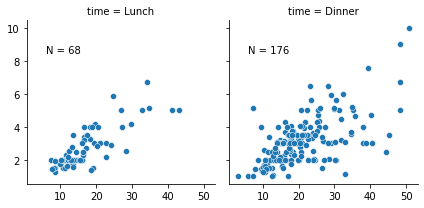

In [48]:
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .8, f"N = {n}", transform=ax.transAxes)

g = sns.FacetGrid(df_tips, col="time")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.map_dataframe(annotate)

### Boxplots

In [71]:
df_tips[['total_bill']].describe().T

count       mean       std   min      25%     50%      75%    max
total_bill  244.0  19.785943  8.902412  3.07  13.3475  17.795  24.1275  50.81

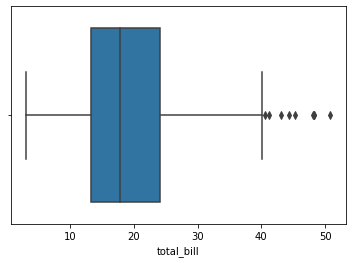

In [69]:
sns.boxplot(x=df_tips['total_bill']);
# first vertical line represents minimum value. -> 3.07
# second vertical line represents 25% percentile -> 13.3475
# third vertical line represents 50% percentile(median) -> 17.795
# fourth vertical line represents 75% percentile -> 24.1275
# last vertical line represents the maximum -> 50.81

#black points represents the outliers

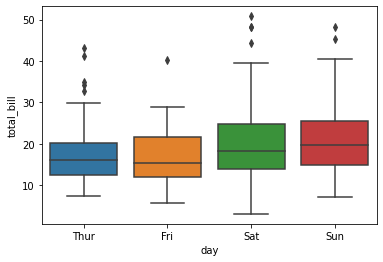

In [72]:
sns.boxplot(x=df_tips['day'], y=df_tips['total_bill'], data=df_tips);

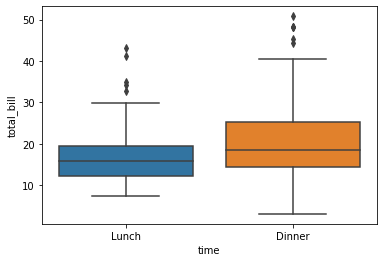

In [73]:
sns.boxplot(x=df_tips['time'], y=df_tips['total_bill'], data=df_tips);

In [74]:
df_tips.groupby('time')['total_bill'].median()

time
Lunch     15.965
Dinner    18.390
Name: total_bill, dtype: float64

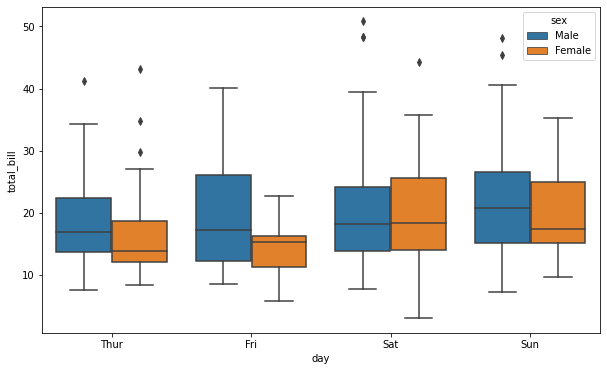

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_tips['day'], y=df_tips['total_bill'], hue='sex', data=df_tips);

In [82]:
df_tips.groupby(['day','sex'])['total_bill'].median() # max(), mean()

day   sex   
Thur  Male      41.19
      Female    43.11
Fri   Male      40.17
      Female    22.75
Sat   Male      50.81
      Female    44.30
Sun   Male      48.17
      Female    35.26
Name: total_bill, dtype: float64

### Violin Plot

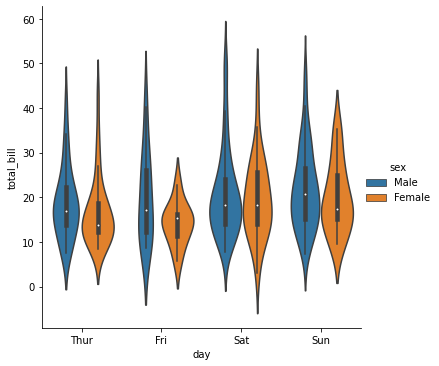

In [83]:
sns.catplot(x='day', y='total_bill', kind='violin', hue='sex', data=df_tips);

### Scatter Plot
* Scatter plot is used to show two different numerical features.

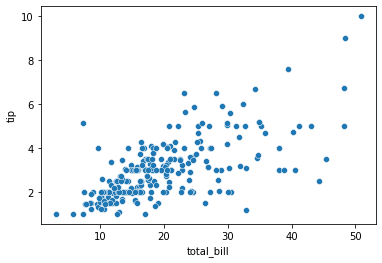

In [89]:
sns.scatterplot(data=df_tips, x='total_bill', y='tip');

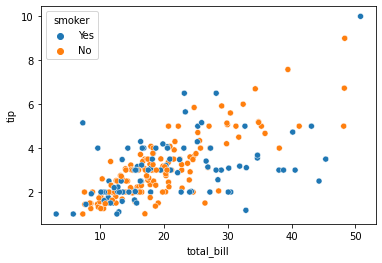

In [88]:
sns.scatterplot(data=df_tips, x='total_bill', y='tip',hue='smoker');

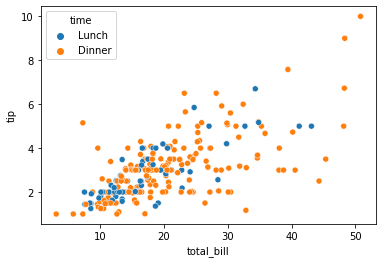

In [90]:
sns.scatterplot(data=df_tips, x='total_bill', y='tip',hue='time');

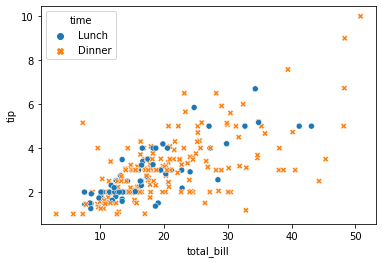

In [91]:
sns.scatterplot(data=df_tips, x='total_bill', y='tip',hue='time', style='time');

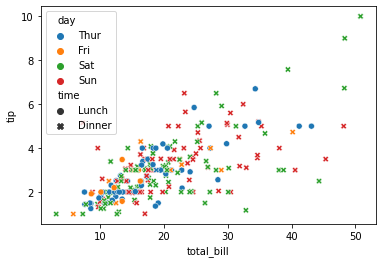

In [92]:
sns.scatterplot(data=df_tips, x='total_bill', y='tip',hue='day', style='time');

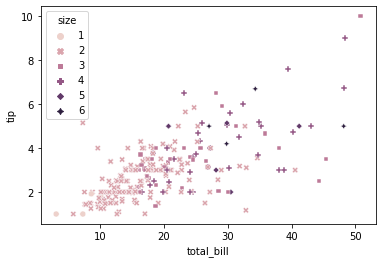

In [94]:
sns.scatterplot(data=df_tips, x='total_bill', y='tip',hue='size', style='size');

### Regression Plots

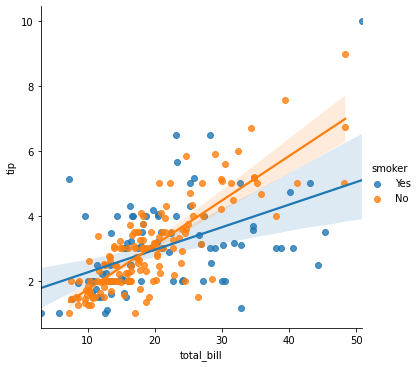

In [96]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=df_tips);

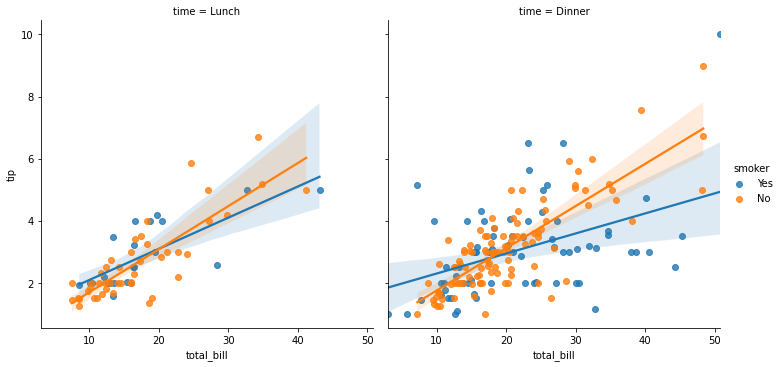

In [97]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', data=df_tips);

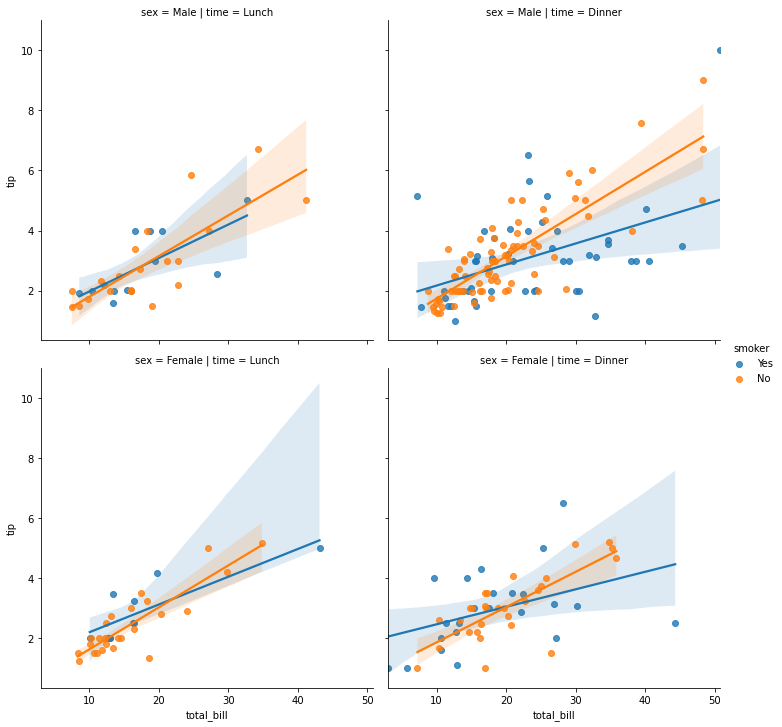

In [99]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', row='sex', data=df_tips);

## Iris Dataframe

In [101]:
df_iris = sns.load_dataset('iris')
df_iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

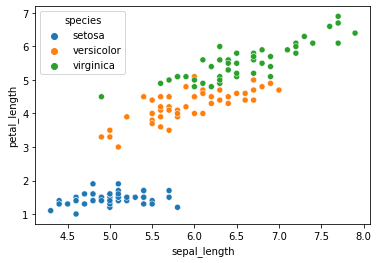

In [102]:
sns.scatterplot(x='sepal_length', y='petal_length', data=df_iris, hue='species');

### Pair Plots

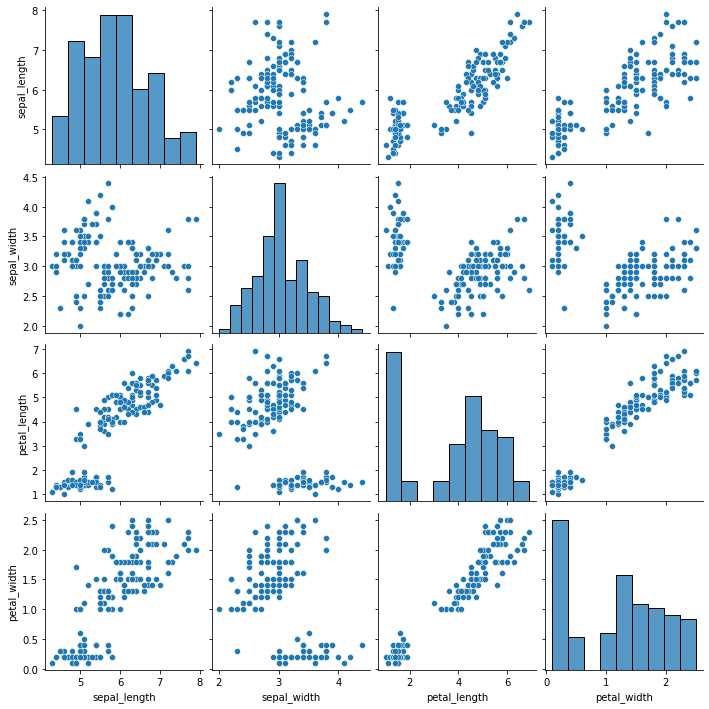

In [105]:
sns.pairplot(data=df_iris);

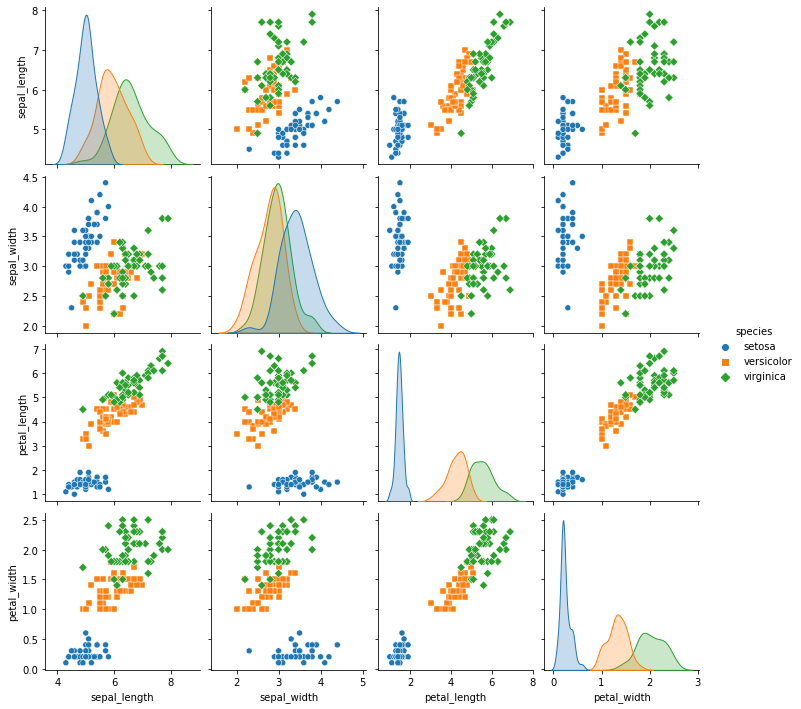

In [111]:
sns.pairplot(df_iris, hue="species",  markers=["o", "s", "D"]); 

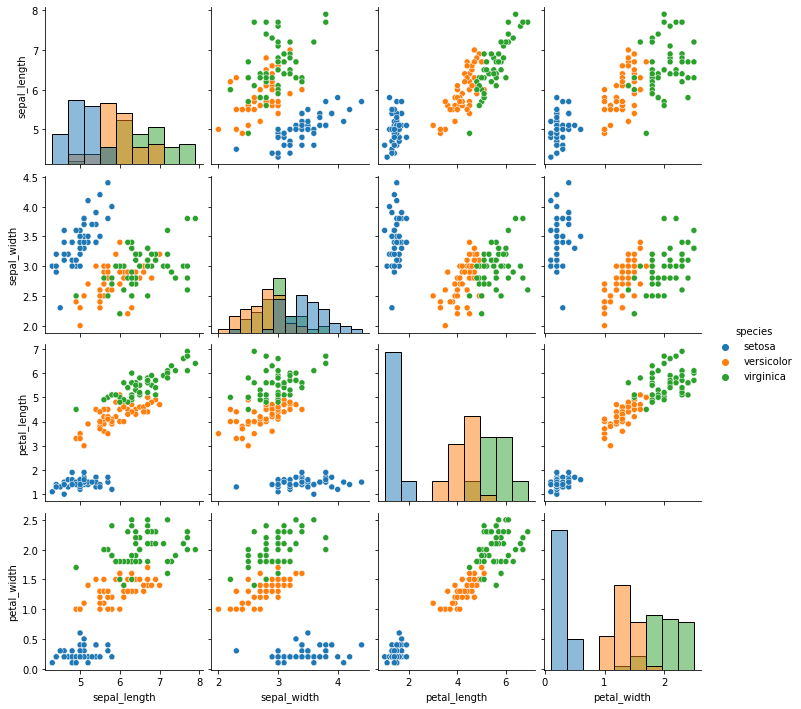

In [106]:
sns.pairplot(df_iris, hue="species", diag_kind="hist"); 

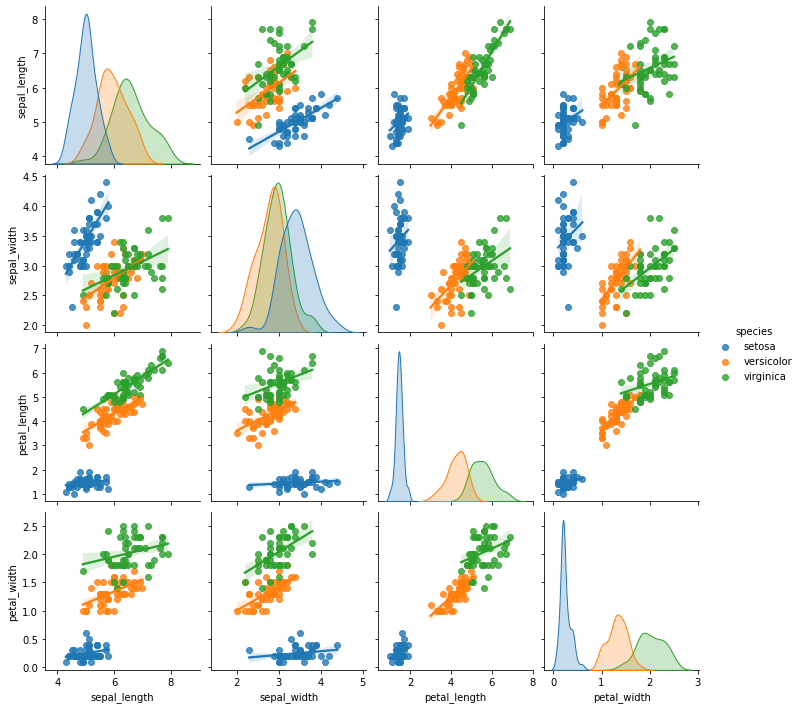

In [113]:
sns.pairplot(df_iris, hue="species", kind='reg'); 

## Flights Dataframe

In [115]:
df_flights = sns.load_dataset('flights')
df_flights.head(10)

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
5  1949   Jun         135
6  1949   Jul         148
7  1949   Aug         148
8  1949   Sep         136
9  1949   Oct         119

In [117]:
pivot_flights = df_flights.pivot(index='month',columns='year', values='passengers')
pivot_flights.head(15)

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   310   362   390
Dec     118   140   166   194   201   229   278   306   336   337   405   432

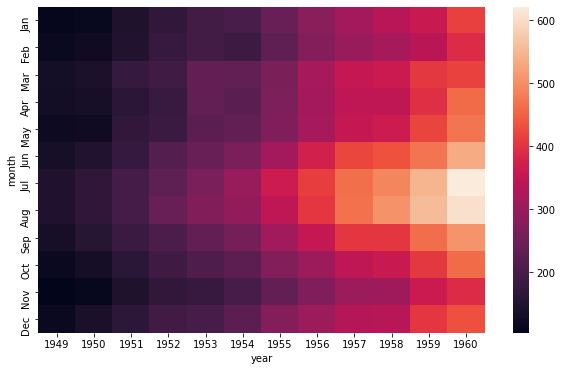

In [119]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot_flights);

# lighter squares represent more passengers

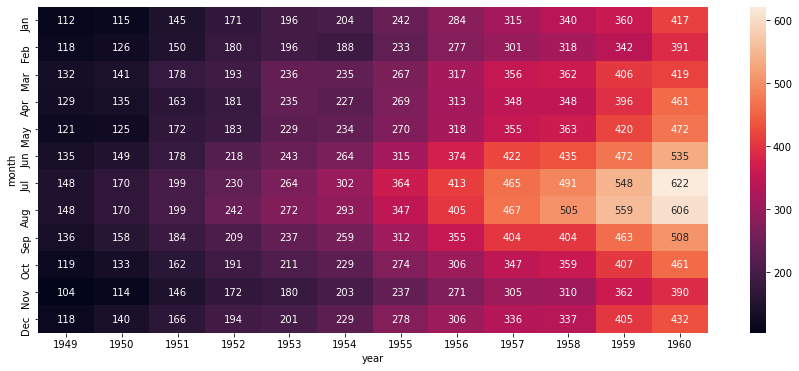

In [122]:
plt.figure(figsize=(15,6))
sns.heatmap(pivot_flights, annot=True, fmt='d');

## Time Series Data
* https://plotly.com/python/time-series/

In [139]:
# import pandas_datareader as pr
#! pip install pandas_datareader
# apple = pr.get_data_yahoo("APPL", start='2024-01-01', end='2024-02-18')

In [137]:
df = px.data.stocks()
fig = px.line(df, x='date', y="GOOG")
fig.show()

In [144]:
df = px.data.stocks(indexed=True)-1
fig = px.area(df, facet_col="company", facet_col_wrap=2)
fig.show()

In [146]:
df = px.data.stocks()
fig = px.line(df, x="date", y=df.columns,
              hover_data={"date": "|%B %d, %Y"},
              title="Company's Price Markets")
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()